****03.02: моделі****

Визначимо знак функції в залежності від значення аргументів

У моделях є 3 штуки (на прикладі функції с = a x1+b x2-d + l(a^2+b^2)):

Розмірності (Dimensions) - х1, х2, f1, f2

Параметри (Parameters) - a, b, d

Гіперпараметри (hyperparameter) - l (Те, що задається до навчання. Як саме модель буде навчатись)

Для цього прикладу, якщо переробити цю функцію на лінійну регресію, то:

a, b -> w1, w2: weight (ваги) (визначається під час навчання)

x1, x2: features (фічі) (початкові дані)

l: гіперпараметр (задається до навчання)

Сенс навчання: підібрати такі параметри, щоб різниця передбачених та справжніх значень була нулем або наближеним до нуля

In [7]:
def g(x1,x2):
    c = 2*x1+4*x2-10
    if c<0:
        return -1
    else:
        return 1
print(g(2, 3))

1


In [9]:
print(g(5, -6))

-1


Змінений приклад

In [ ]:
def g(x1,x2, a, b, d, e):
    c = a*x1+b*x2+d*(x1**2)-e
    if c<0:
        y_pred = -1
    else:
        y_pred = 1

*Метрика помилки*

MSE - середня квадратична помилка. Сума квадратів різниць передбачених та справжніх значень поділене на кількість доданків

*Лінійна регресія*

Приклад: yi = a*xi + b

y = X*A

y - матриця ігриків, передбачень

X - матриця значень (двовимірна nx2, де друга колонка - одиниці)

A - матриця параметрів (a, b)

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

Для прикладу, візьмемо такий графік

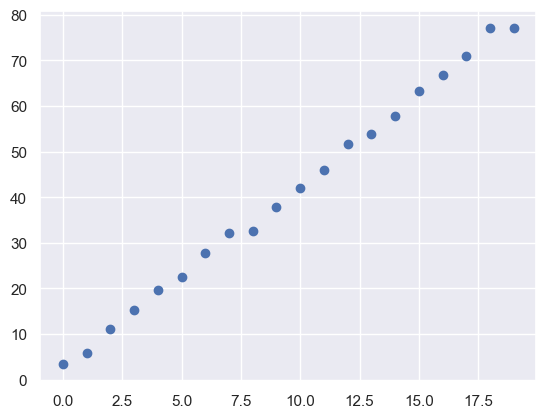

In [49]:
n = 20
X = np.arange(n)
y = 4*X + 3 + np.random.randn(X.size)
plt.scatter(X, y)
plt.show()

Кількість точок координатний прямиї

In [50]:
X.shape

(20,)

In [51]:
y.shape

(20,)

Створюємо вектор стовпчик одиниць

In [52]:
on = np.ones((X.size, 1))
on.shape

(20, 1)

Перетворення Х та вектор стовпчик

In [53]:
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [54]:
X[:, np.newaxis]

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19]])

Прикріпляємо до Х вектор стовпчик одиниць

In [55]:
X2 = np.hstack((X[:, np.newaxis], on))

In [56]:
X2

array([[ 0.,  1.],
       [ 1.,  1.],
       [ 2.,  1.],
       [ 3.,  1.],
       [ 4.,  1.],
       [ 5.,  1.],
       [ 6.,  1.],
       [ 7.,  1.],
       [ 8.,  1.],
       [ 9.,  1.],
       [10.,  1.],
       [11.,  1.],
       [12.,  1.],
       [13.,  1.],
       [14.,  1.],
       [15.,  1.],
       [16.,  1.],
       [17.,  1.],
       [18.,  1.],
       [19.,  1.]])

Перетворення y в вектор стовпчик

In [57]:
y = y[:, np.newaxis]
y.shape

(20, 1)

Розв’язок задачі найменших квадратів для переозначеної системи лінійних рівнянь

In [58]:
a = np.linalg.lstsq(X2, y, rcond=None)

Повернене значення (a) — кортеж із 4 елементів:

a(0) — вектор коефіцієнтів β (розмірністю n × 1), що мінімізує різницю ||X2β - y||.

a(1) — масив квадратів залишків (різниця між передбаченими та реальними значеннями y), якщо m > n, інакше порожній масив.

a(2) — ранг матриці X2.

a(3) — сингулярні числа X2.

In [61]:
type(a)

tuple

In [60]:
a

(array([[3.98013886],
        [2.89927169]]),
 array([23.02115301]),
 np.int32(2),
 array([49.84623483,  2.31362763]))

In [59]:
a[0]

array([[3.98013886],
       [2.89927169]])

In [62]:
y_pred = a[0][0]*X+a[0][1]

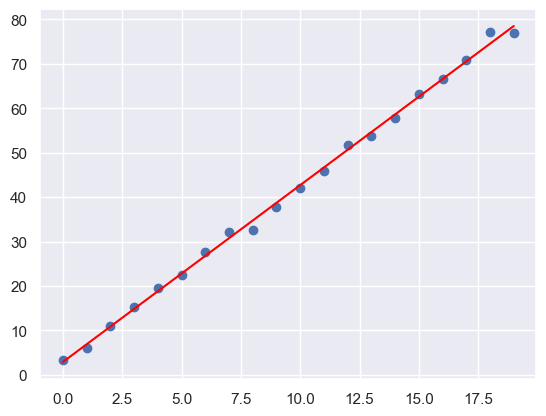

In [64]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')